# Clonality Score
## How homogeneous is the sample?
### The higher the score, the more homogeneous the sample is.
####  


$$ 
\\Clonality\space Score = {1} + \frac{1}{\log_2n}\sum_{i} p_i\log_2p_i
$$

####  

In [3]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline

In [2]:
cd /Users/kgrigait/Desktop/new_data

/Users/kgrigait/Desktop/new_data


In [4]:
#load data - paired CD4/CD8 dataframes.
TRpCD4_prod_1=pd.read_csv('S1/TRcd4_productive.txt', sep='\t')
TRpCD4_prod_2=pd.read_csv('S2/TRcd4_productive.txt', sep='\t')
TRpCD4_prod_3=pd.read_csv('S3/TRcd4_productive.txt', sep='\t')
TRpCD4_prod_4=pd.read_csv('S4/TRcd4_productive.txt', sep='\t')
TRpCD4_prod_5=pd.read_csv('S5/TRcd4_productive.txt', sep='\t')

TRpCD8_prod_1=pd.read_csv('S1/TRcd8_productive.txt', sep='\t')
TRpCD8_prod_2=pd.read_csv('S2/TRcd8_productive.txt', sep='\t')
TRpCD8_prod_3=pd.read_csv('S3/TRcd8_productive.txt', sep='\t')
TRpCD8_prod_4=pd.read_csv('S4/TRcd8_productive.txt', sep='\t')
TRpCD8_prod_5=pd.read_csv('S5/TRcd8_productive.txt', sep='\t')

In [5]:
def clonality(df):
    """This function calculates clonality score by subtracting Shannon's
    Entropy from 1 for paired as well as split by alpha and beta chain dataframes.
    Input: df - paired alpha/beta dataframe.
    Outputs: clonality score for paired, alpha and beta datasets.
    """
    #Put alpha and beta chain sequences into one string.
    df['CDR3_AB'] = df['NSeqCDR3A']+'_'+df['NSeqCDR3B']
    #calculate the number of occurances of each paired, alpha and beta sequences.
    p_count=pd.DataFrame(df.CDR3_AB.value_counts())
    a_count=pd.DataFrame(df.NSeqCDR3A.value_counts())
    b_count=pd.DataFrame(df.NSeqCDR3B.value_counts())
    #calculate frequencies of each paired, alpha and beta sequences.
    p_freq=np.divide((np.array(p_count.CDR3_AB)+0.0),sum(np.array(p_count.CDR3_AB)+0.0))
    a_freq=np.divide((np.array(a_count.NSeqCDR3A)+0.0), sum(np.array(a_count.NSeqCDR3A)+0.0))
    b_freq=np.divide((np.array(b_count.NSeqCDR3B)+0.0), sum(np.array(b_count.NSeqCDR3B)+0.0))
    #calculate clonality score using the frequencies of each unique sequence.
    p_clonality=1-np.sum(np.multiply(np.log2(p_freq),p_freq))*(-1)/(math.log(len(p_freq))/math.log(2))
    a_clonality=1-np.sum(np.multiply(np.log2(a_freq),a_freq))*(-1)/(math.log(len(a_freq))/math.log(2))
    b_clonality=1-np.sum(np.multiply(np.log2(b_freq),b_freq))*(-1)/(math.log(len(b_freq))/math.log(2))
    return p_clonality, a_clonality, b_clonality
    

In [6]:
#Use the function to calculate clonality scores for each subject.
p41, a41, b41 = clonality(TRpCD4_prod_1)
p42, a42, b42 = clonality(TRpCD4_prod_2)
p43, a43, b43 = clonality(TRpCD4_prod_3)
p44, a44, b44 = clonality(TRpCD4_prod_4)
p45, a45, b45 = clonality(TRpCD4_prod_5)

p81, a81, b81 = clonality(TRpCD8_prod_1)
p82, a82, b82 = clonality(TRpCD8_prod_2)
p83, a83, b83 = clonality(TRpCD8_prod_3)
p84, a84, b84 = clonality(TRpCD8_prod_4)
p85, a85, b85 = clonality(TRpCD8_prod_5)

#### Figure 4D

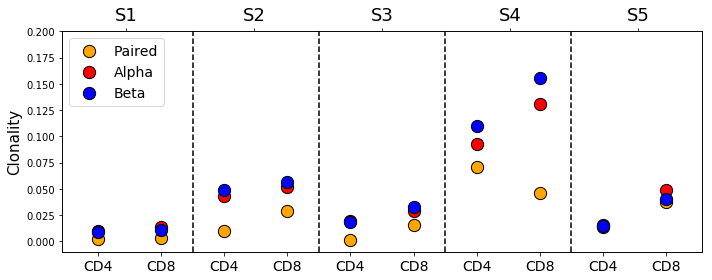

In [7]:
#make arrays of clonality scores for paired, and alpha and beta sequences.
paired=([p41,p81,p42,p82,p43,p83,p44,p84,p45,p85])
alpha=([a41,a81,a42,a82,a43,a83,a44,a84,a45,a85])
beta=([b41,b81,b42,b82,b43,b83,b44,b84,b45,b85])
#initiate x axis.
n=([1,2,3,4,5,6,7,8,9,10])

f, ax = plt.subplots(1, figsize=(10,4))
ax.scatter(n,paired,color='orange', edgecolor='black', marker='o', s=150, label='Paired')
ax.scatter(n,alpha,color='red', edgecolor='black', marker='o', s=150, label='Alpha')
ax.scatter(n,beta,color='blue', edgecolor='black', marker='o', s=150, label='Beta')
plt.ylim(-0.01,0.2)
x_ticks_labels = ['CD4','CD8','CD4','CD8','CD4','CD8','CD4','CD8','CD4','CD8']
ax.set_xticks(n)
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=14)
plt.ylabel('Clonality', fontsize=15)

ax2 = ax.twiny()
ax2.set_xlim(0, 10)
ax2.set_xticks([1,3,5,7,9])
x2_ticks_labels=['S1','S2','S3','S4','S5']
ax2.set_xticklabels(x2_ticks_labels, rotation='horizontal', fontsize=18)

ax.legend(fontsize=14, loc='upper left')
for i in np.arange(2.5,10.5,2):
    ax.axvline(i, linestyle='--', color='k')
plt.tight_layout()
plt.savefig('clonality_pairedvsingle.png')
